In [19]:
import pandas as pd

df = pd.read_excel("comparison_results.xlsx")
df

,Key,processed_llama_answers.json,processed_my_llama_answers.json,paper1.json,clip_similarities.json,clip_text_similarities.json,sem_sim_data_all237_minilm.json,sem_sim_wiki.json
0,set0,1,1,1,0,0,0,0
1,set1,2,2,1,1,0,1,0
2,set2,4,2,1,0,0,0,2
3,set3,4,2,1,0,0,0,0
4,set4,4,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...
195,set195,1,4,0,0,0,1,0
196,set196,2,2,0,0,0,0,0
197,set197,4,2,0,0,0,0,0
198,set198,1,2,1,0,0,0,0


In [20]:
df.columns[1].split(".json")[0]

'processed_llama_answers'

In [21]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column],errors='coerce').fillna(0)
    new_col_name = "result"+column.split(".json")[0]
    df[new_col_name] = df[column].apply( lambda x: "complete" if x == 4 else "partial" if 0 < x < 4 else "fail" )
df.to_excel("test.xlsx", index=False)


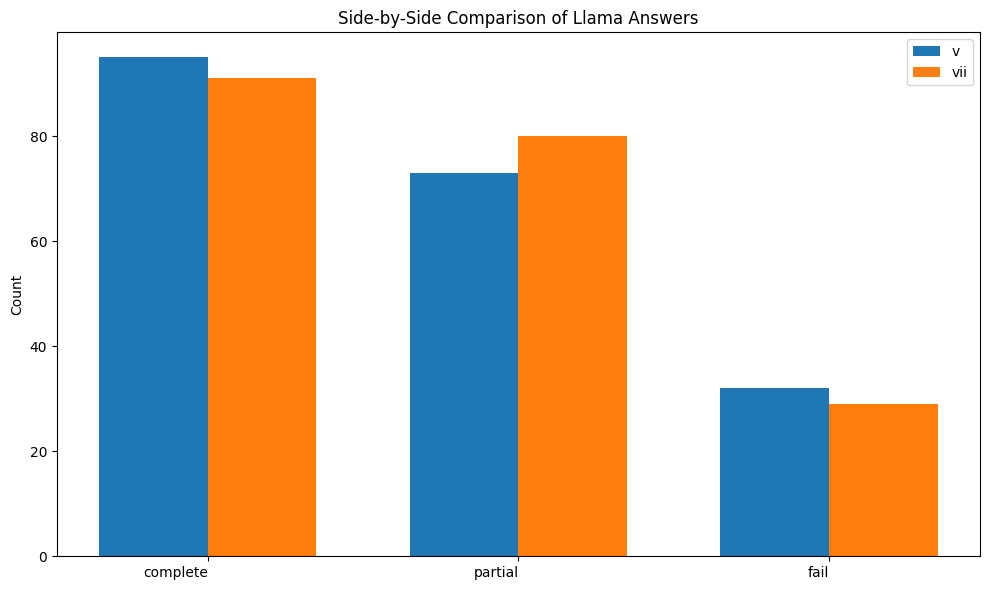

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get value counts for each column
llama_counts = df['resultprocessed_llama_answers'].value_counts()
my_llama_counts = df['resultprocessed_my_llama_answers'].value_counts()

# Get unique categories and their indices
categories = llama_counts.index.union(my_llama_counts.index)
x_pos = np.arange(len(categories))

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars side-by-side
ax.bar(x_pos - width/2, llama_counts.reindex(categories).fillna(0), width, label='v')
ax.bar(x_pos + width/2, my_llama_counts.reindex(categories).fillna(0), width, label='vii')

# Set labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Side-by-Side Comparison of Llama Answers')
ax.set_xticks(x_pos)
ax.set_xticklabels(categories, ha='right')  # Rotate x-axis labels
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

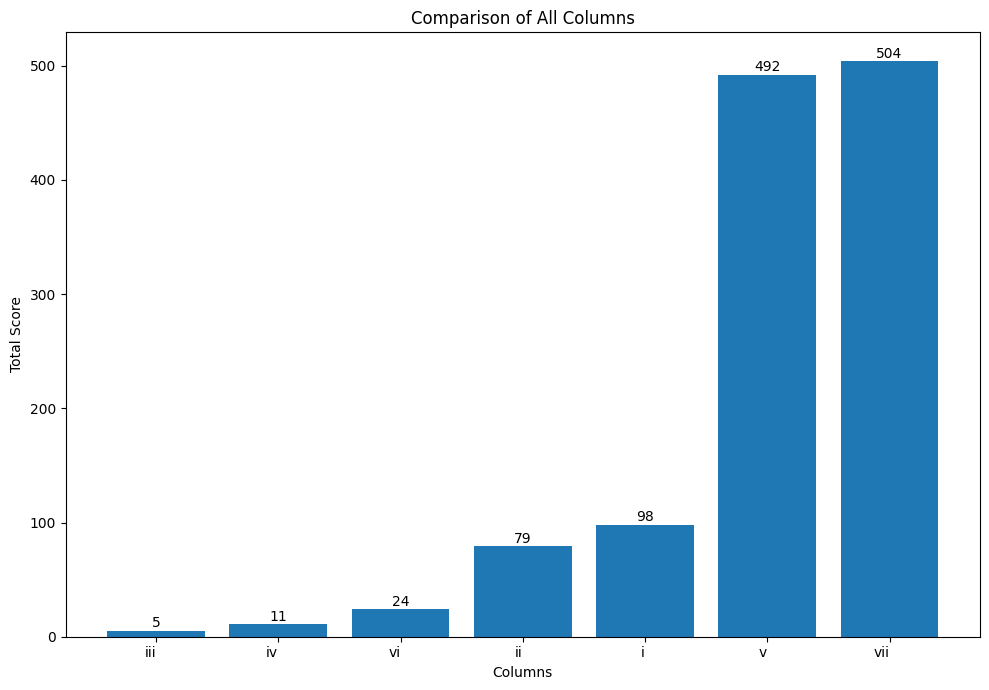

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the columns you want to compare
columns_to_compare = [
    'paper1.json',
    'sem_sim_wiki.json',
    'clip_similarities.json',
    'clip_text_similarities.json',
    'processed_llama_answers.json',
    'sem_sim_data_all237_minilm.json',
    'processed_my_llama_answers.json',
]

# Calculate the total score for each column
total_scores = df[columns_to_compare].sum()
total_scores = total_scores.sort_values()
label_mapping_display = {


    'paper1.json': 'i',
    'sem_sim_wiki.json':'ii',
    'clip_similarities.json':'iii',
    'clip_text_similarities.json':'iv',
    'processed_llama_answers.json': 'v',
    'sem_sim_data_all237_minilm.json':'vi',
    'processed_my_llama_answers.json': 'vii',

}
# Create the bar chart
plt.figure(figsize=(10, 7))
bars=plt.bar(total_scores.index, total_scores.values, )
plt.title('Comparison of All Columns')
plt.xlabel('Columns')
plt.ylabel('Total Score')
plt.xticks(total_scores.index, [label_mapping_display[col] for col in total_scores.index], ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             int(height), ha='center', va='bottom')
plt.tight_layout()
plt.show()